In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


ModuleNotFoundError: No module named 'sklearn'

- Load Data 💥

In [2]:
df = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
74,LP001253,Male,Yes,3+,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,Y
265,LP001875,Male,No,0,Graduate,No,4095,3447.0,151.0,360.0,1.0,Rural,Y


-  Check Data Shape (Total Rows and Columns) 💥

In [4]:
df.shape

(614, 13)

- Check Null Values in Datset 💥

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Check Duplicates Values in Datset 💥

In [6]:
df.duplicated().sum()

0

- Data Summarize (dtypes, null_values, etc) 💥

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Check Statistical Summary of Datset 💥

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# <div style="text-align:center; border-radius:15px 70px; padding:10px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b> EDA </b></div>

- Data Visualization 💥

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


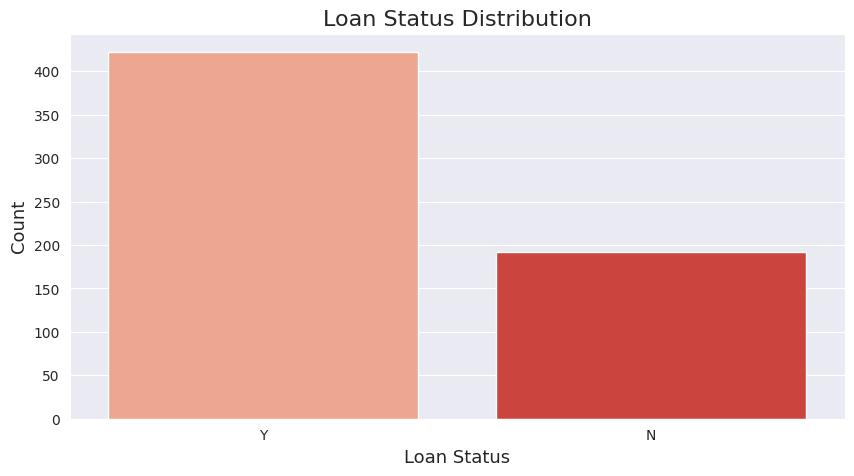

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.countplot(x=df['Loan_Status'], palette='Reds')
plt.title('Loan Status Distribution', fontsize=16)
plt.xlabel('Loan Status', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

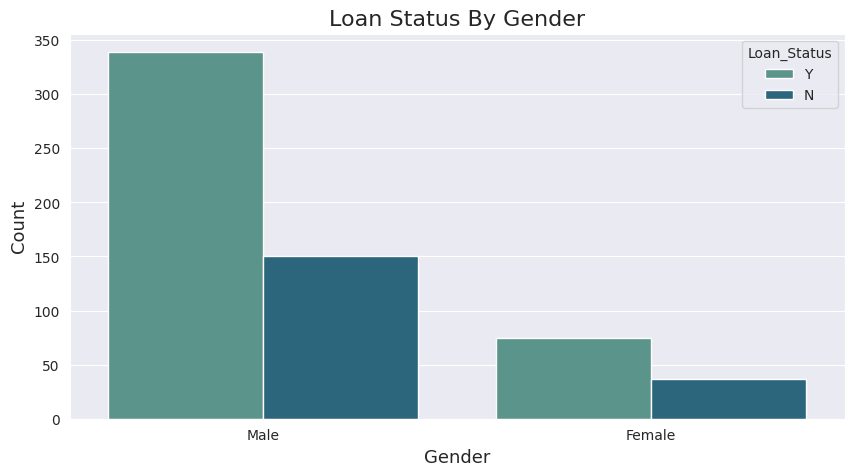

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Gender'], hue=df['Loan_Status'], palette='crest')
plt.title('Loan Status By Gender', fontsize=16)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

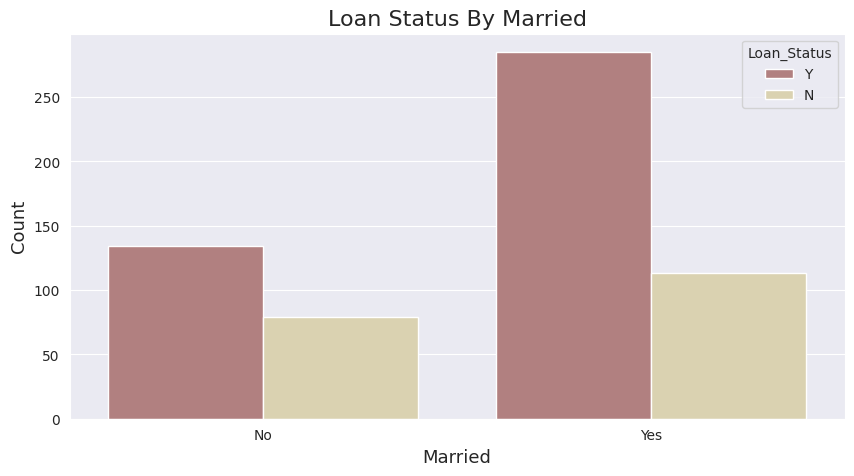

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Married'], hue=df['Loan_Status'], palette='pink')
plt.title('Loan Status By Married', fontsize=16)
plt.xlabel('Married', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

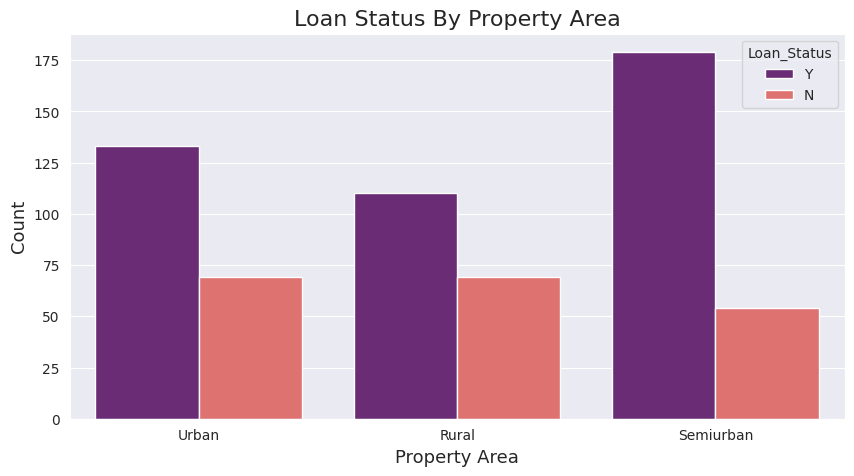

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Property_Area'], hue=df['Loan_Status'], palette='magma')
plt.title('Loan Status By Property Area', fontsize=16)
plt.xlabel('Property Area', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

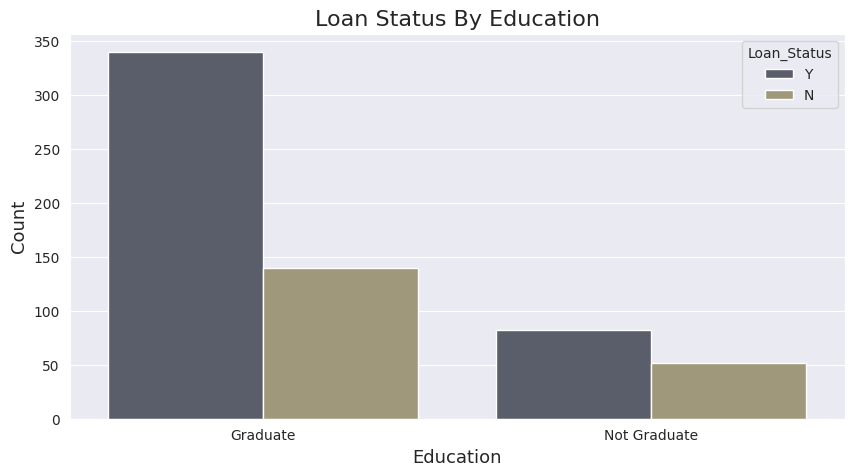

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Education'], hue=df['Loan_Status'], palette='cividis')
plt.title('Loan Status By Education', fontsize=16)
plt.xlabel('Education', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

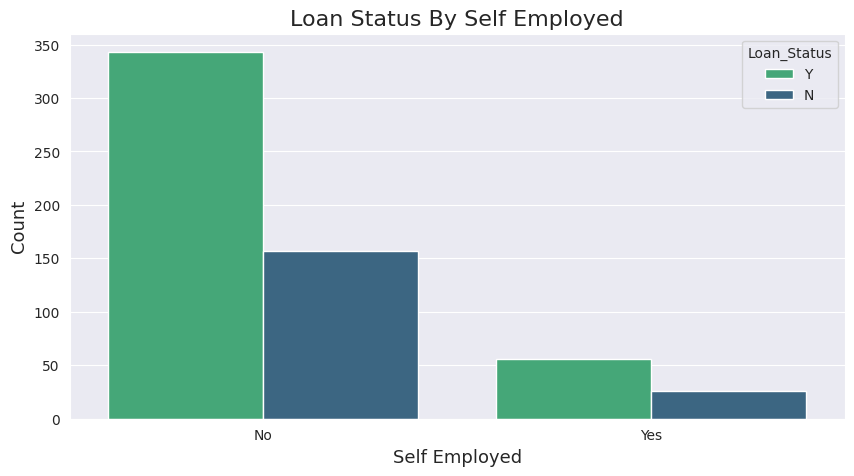

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Self_Employed'], hue=df['Loan_Status'], palette='viridis_r')
plt.title('Loan Status By Self Employed', fontsize=16)
plt.xlabel('Self Employed', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

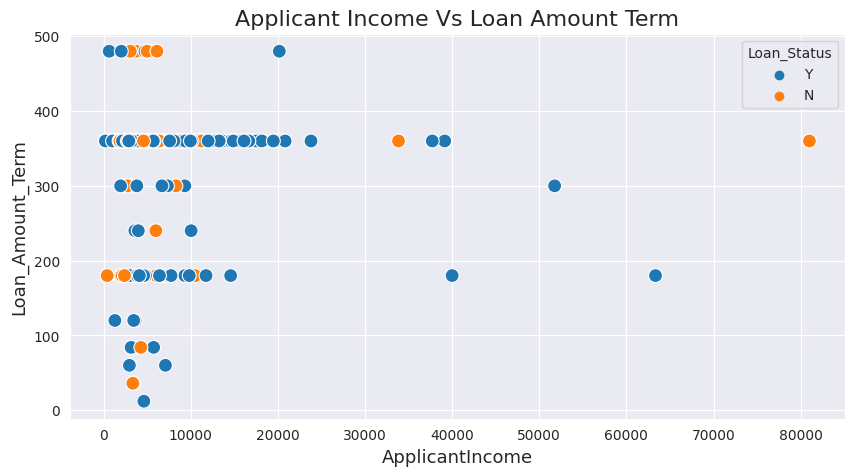

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['ApplicantIncome'], y=df['Loan_Amount_Term'], hue=df['Loan_Status'], s=100)
plt.title('Applicant Income Vs Loan Amount Term', fontsize=16)
plt.xlabel('ApplicantIncome', fontsize=13)
plt.ylabel('Loan_Amount_Term', fontsize=13)
plt.show()

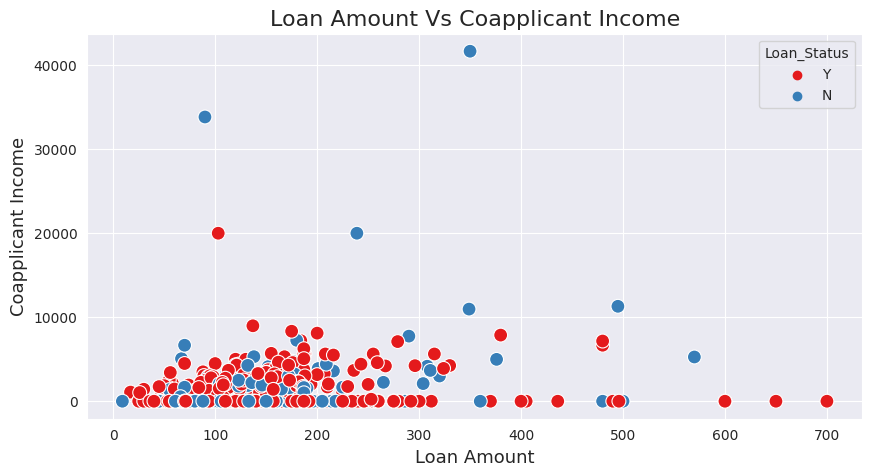

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['LoanAmount'], y=df['CoapplicantIncome'], hue=df['Loan_Status'], s=100, palette='Set1')
plt.title('Loan Amount Vs Coapplicant Income', fontsize=16)
plt.xlabel('Loan Amount', fontsize=13)
plt.ylabel('Coapplicant Income', fontsize=13)
plt.show()

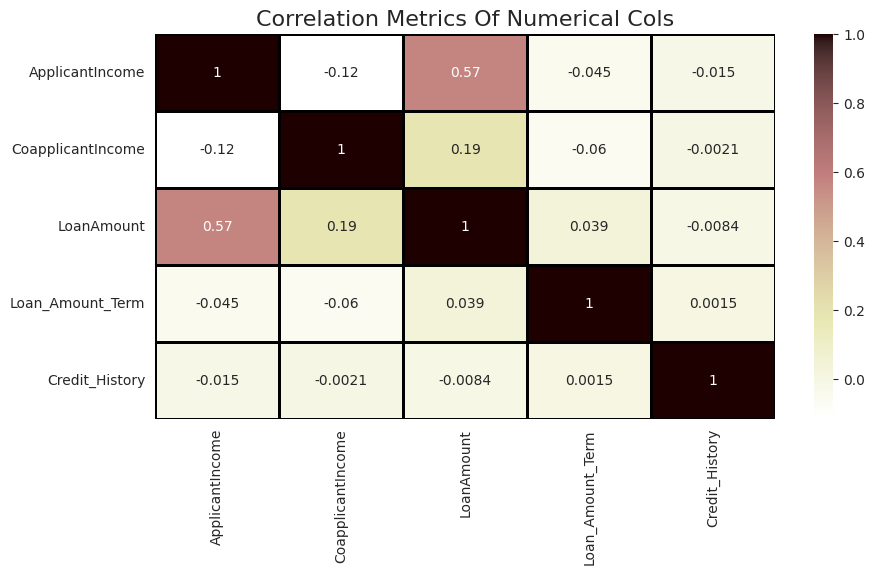

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='pink_r', linewidths='2', linecolor='black')
plt.title('Correlation Metrics Of Numerical Cols', fontsize=16)
plt.show()

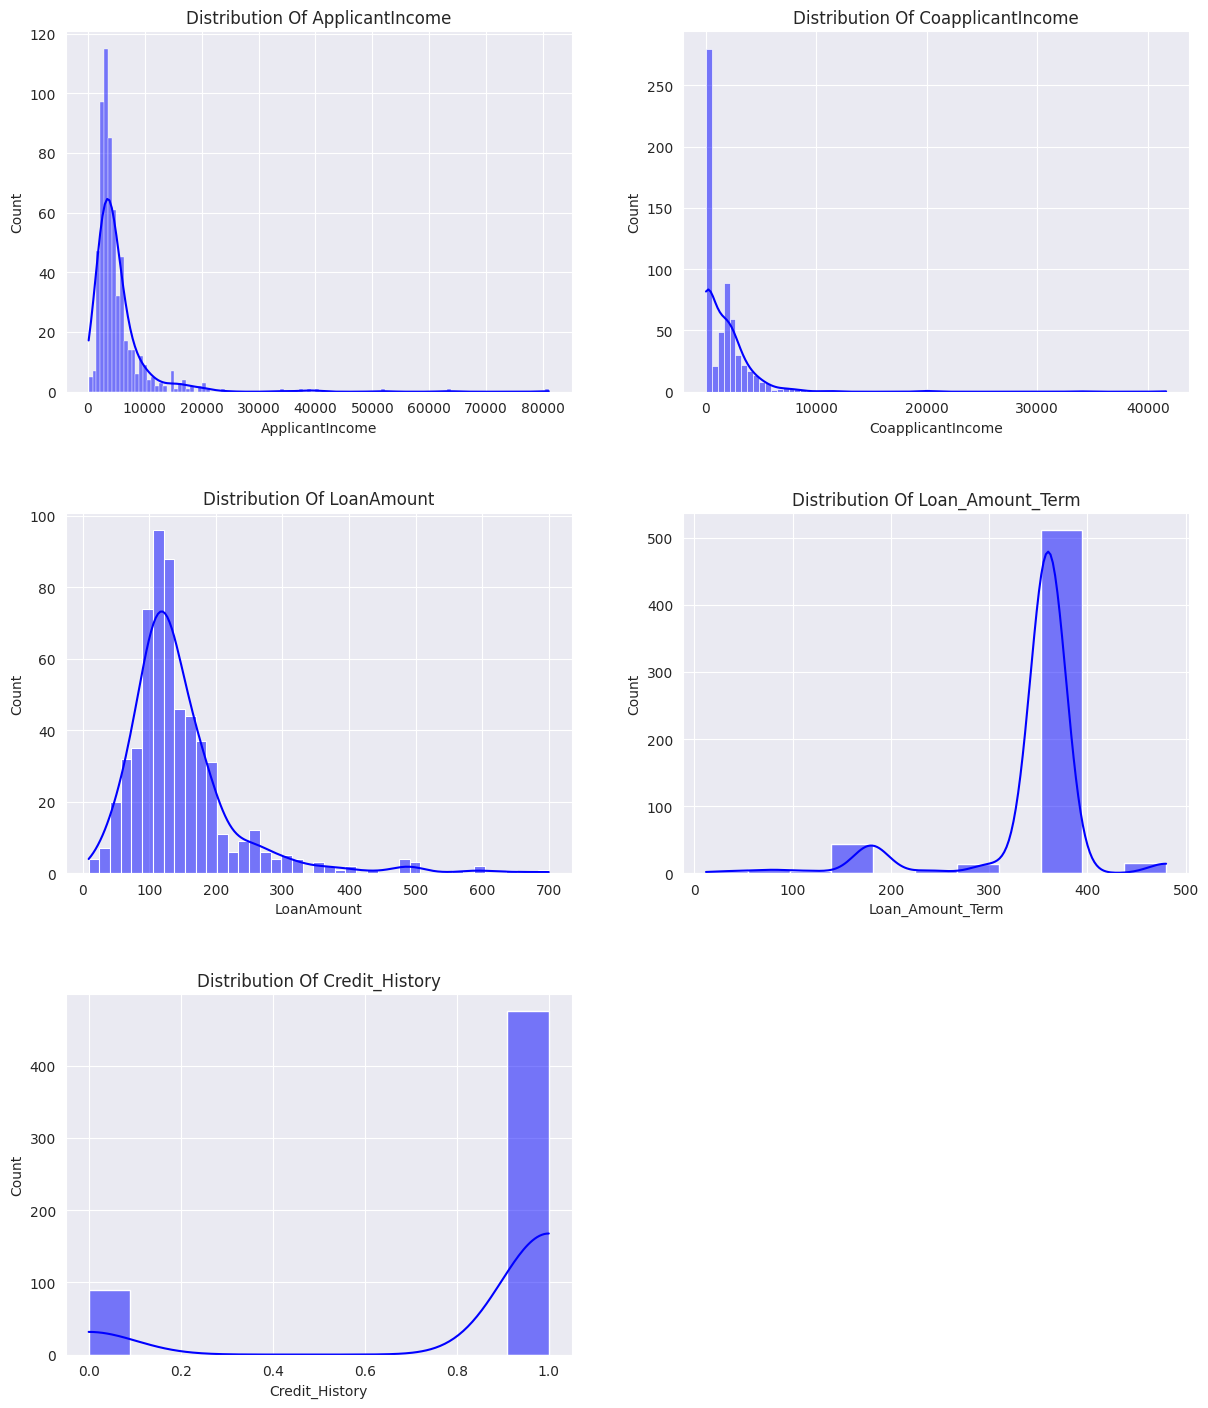

In [19]:
plt.figure(figsize=(13,15))
for c, cols in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                         'Credit_History']):
    plt.subplot(3, 2, c+1)
    sns.histplot(x=cols, data=df, color='blue', kde=True)
    plt.title(f"Distribution Of {cols}")
    plt.tight_layout(pad=4.0)
    
plt.show()

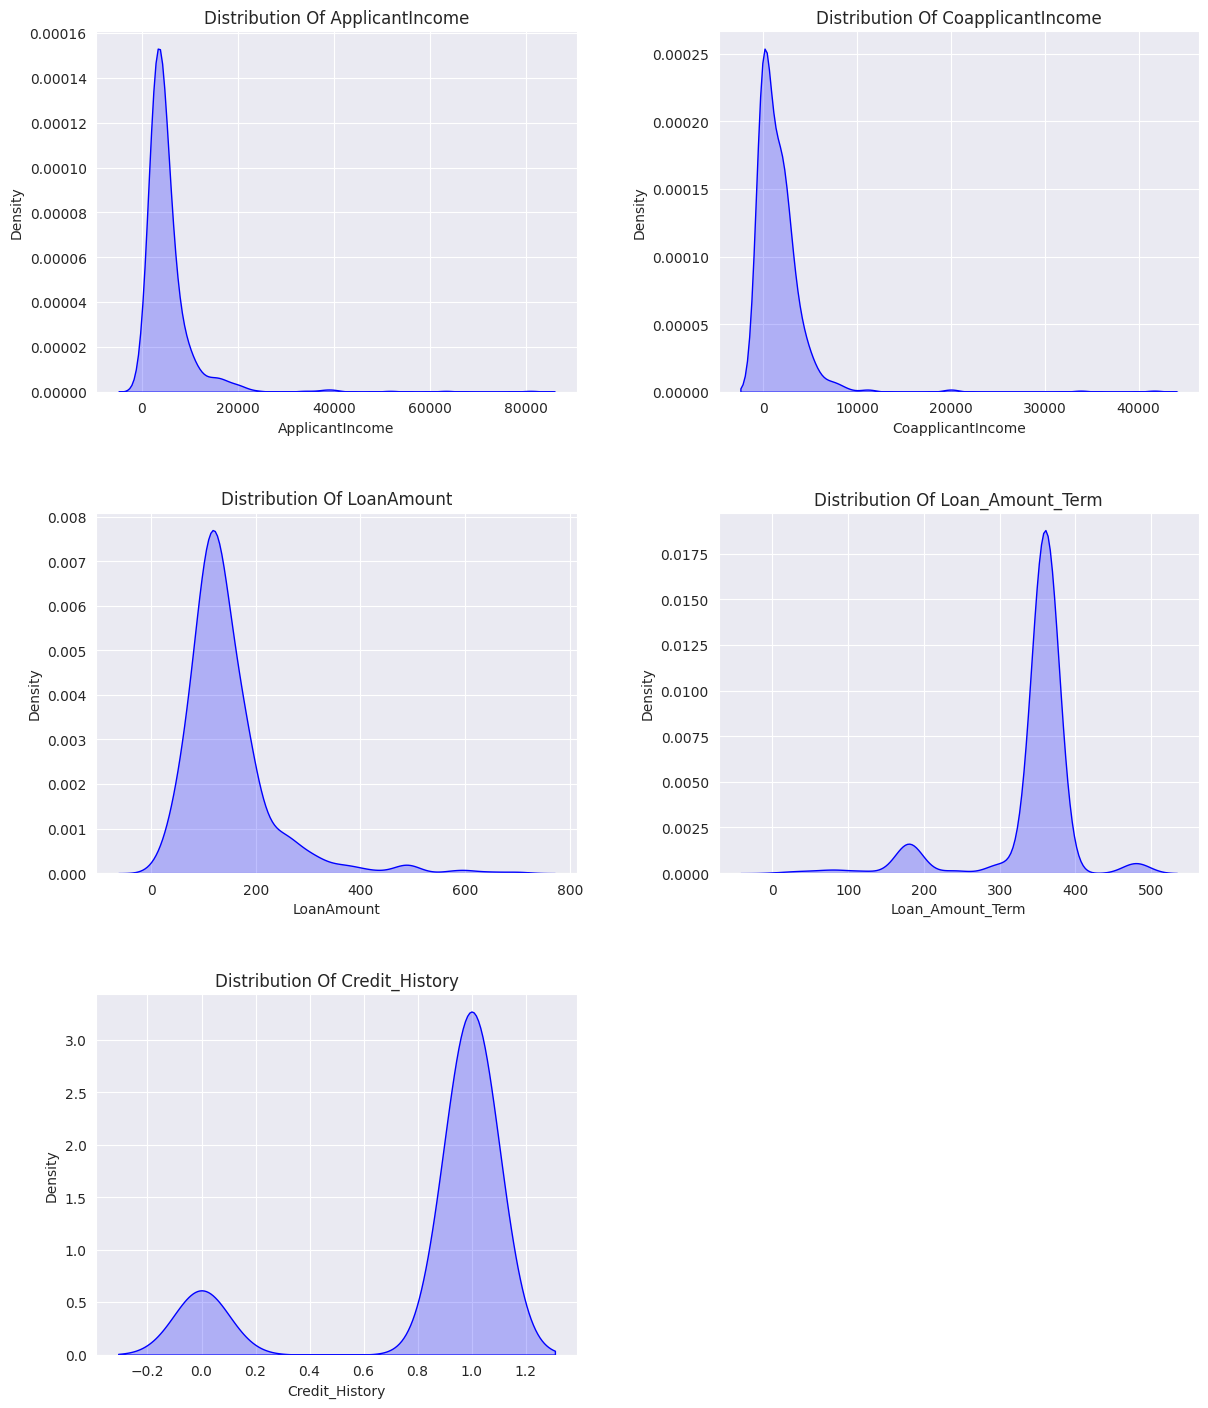

In [20]:
plt.figure(figsize=(13,15))
for c, cols in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                         'Credit_History']):
    plt.subplot(3, 2, c+1)
    sns.kdeplot(x=cols, data=df, color='blue', shade=True)
    plt.title(f"Distribution Of {cols}")
    plt.tight_layout(pad=4.0)
    
plt.show()

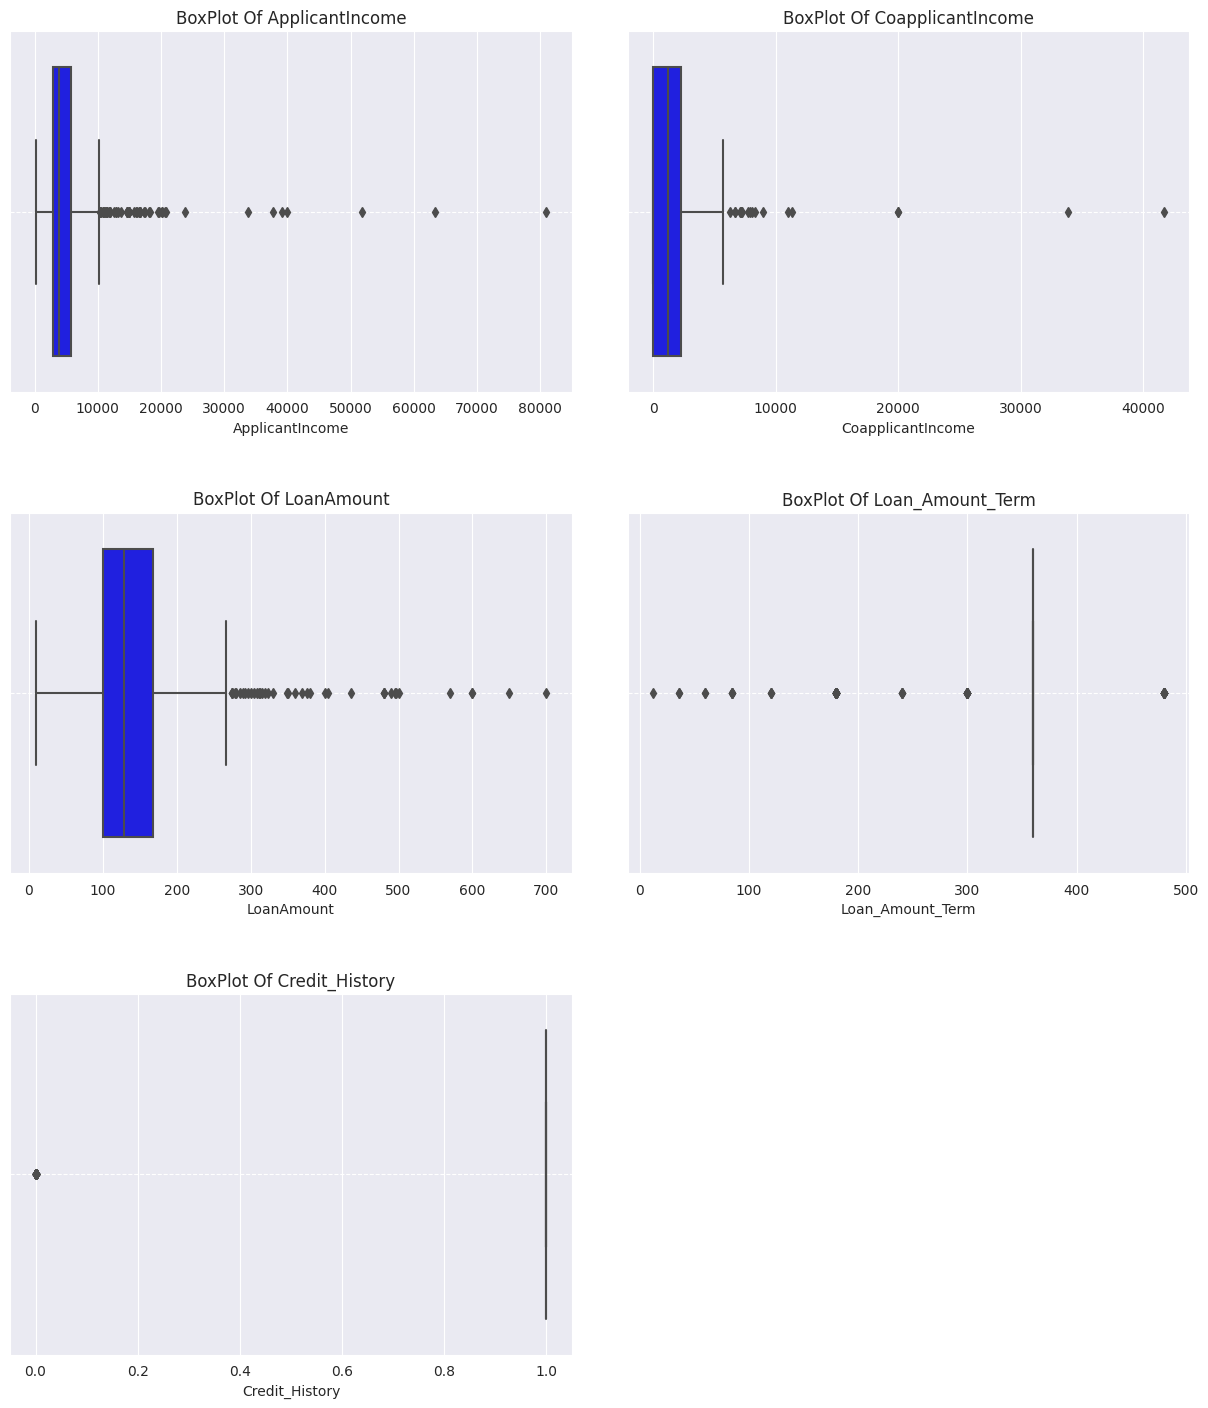

In [21]:
plt.figure(figsize=(13,15))
for c, cols in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                         'Credit_History']):
    plt.subplot(3, 2, c+1)
    sns.boxplot(x=cols, data=df, color='blue')
    plt.title(f"BoxPlot Of {cols}")
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout(pad=4.0)
    
plt.show()

# <div style="text-align:center; border-radius:15px 70px; padding:10px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Fill Null Values</b></div>

In [22]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

# <div style="text-align:center; border-radius:15px 70px; padding:10px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Encoding Categorical Cols </b></div>

In [23]:
enc = LabelEncoder()
for i in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[i] = enc.fit_transform(df[i])

# <div style="text-align:center; border-radius:15px 70px; padding:10px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b> Data Split into Training & Testing </b></div>

In [24]:
X  = df.drop(['Loan_ID', 'Loan_Status', 'Dependents'], axis=1)
y = df['Loan_Status']

X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.3)
print(f"X_train Shape: {X_train.shape}")
print(f"Y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (429, 10)
Y_train Shape: (429,)
X_test Shape: (185, 10)
y_test Shape: (185,)


# <div style="text-align:center; border-radius:15px 70px; padding:10px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b> Models Building </b></div>

In [25]:
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    'XGBoost Classifier': XGBClassifier()
}


💥 Name: Logistic Regression
Accuracy: 0.79
Precision Score: 0.7650602409638554


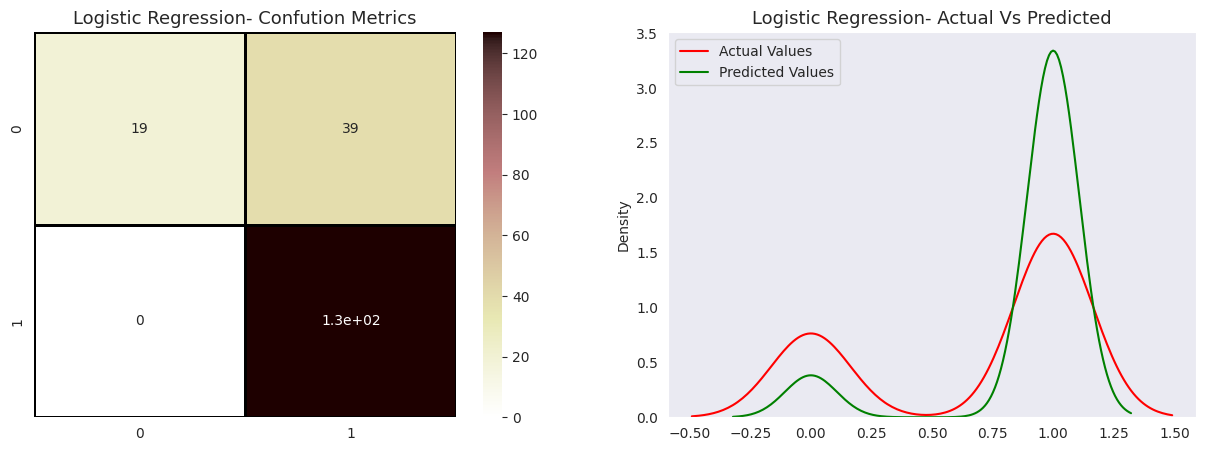


💥 Name: Random Forest Classifier
Accuracy: 0.76
Precision Score: 0.7748344370860927


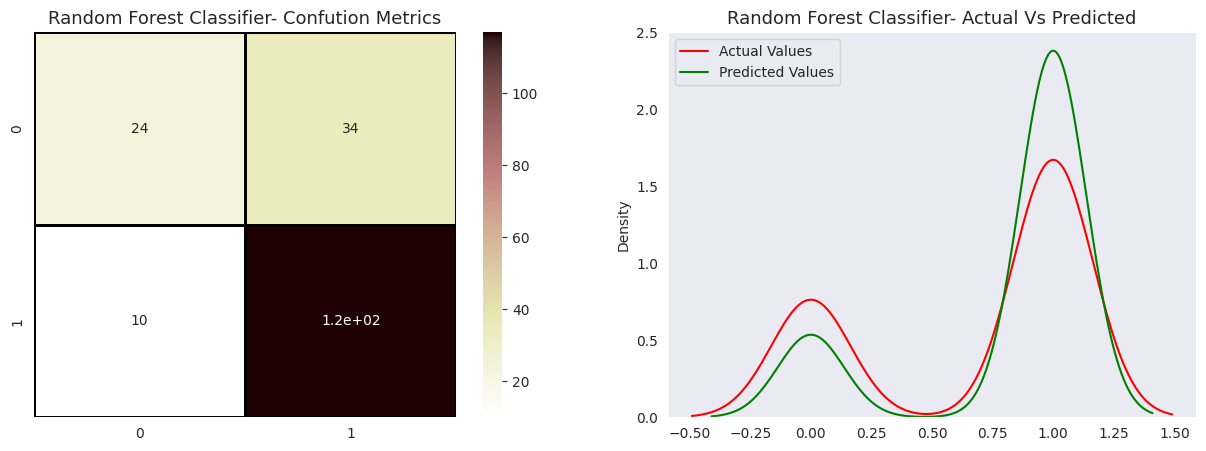


💥 Name: Gradient Boosting Classifier
Accuracy: 0.76
Precision Score: 0.7733333333333333


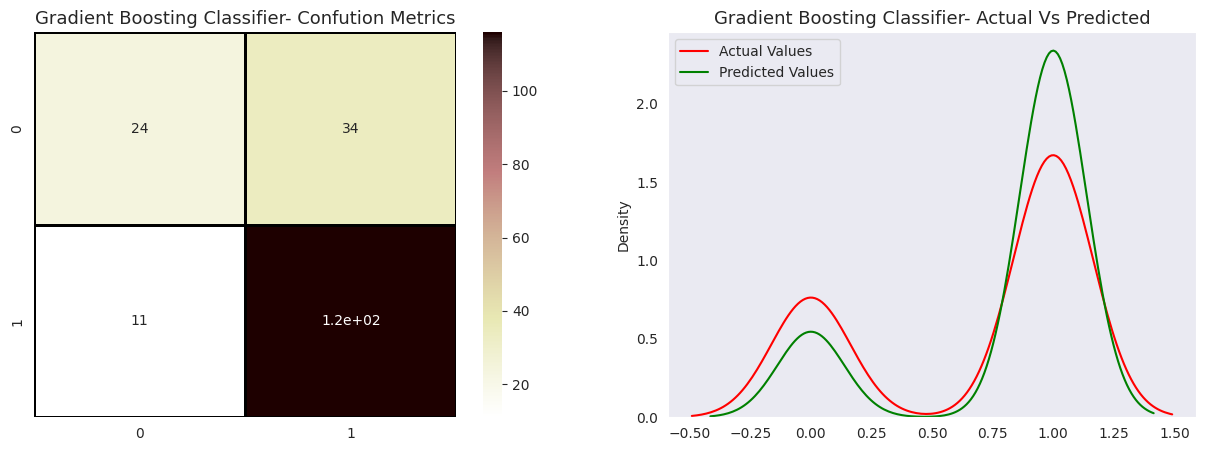


💥 Name: Naive Bayes
Accuracy: 0.77
Precision Score: 0.7607361963190185


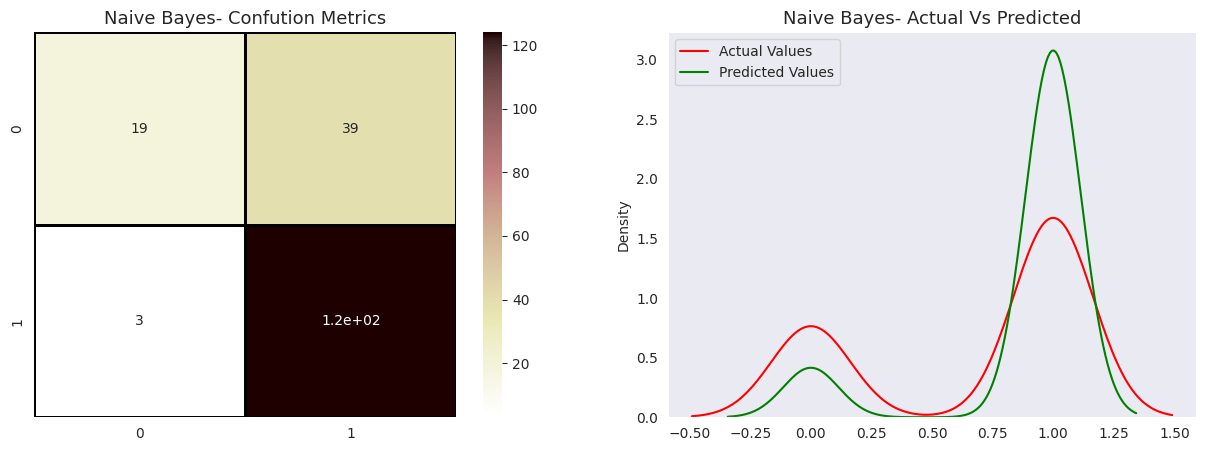


💥 Name: Decision Tree Classifier
Accuracy: 0.70
Precision Score: 0.78125


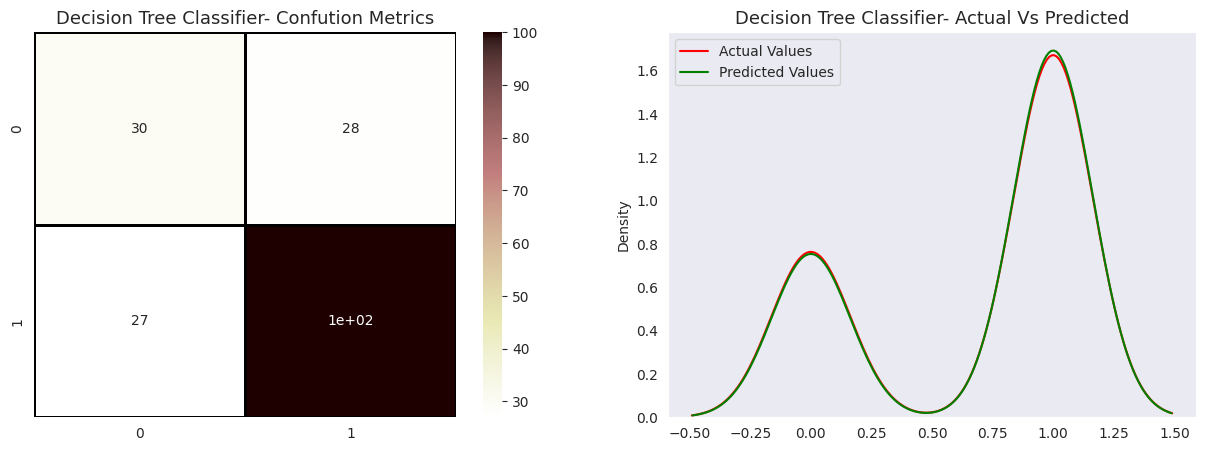


💥 Name: XGBoost Classifier
Accuracy: 0.74
Precision Score: 0.7867647058823529


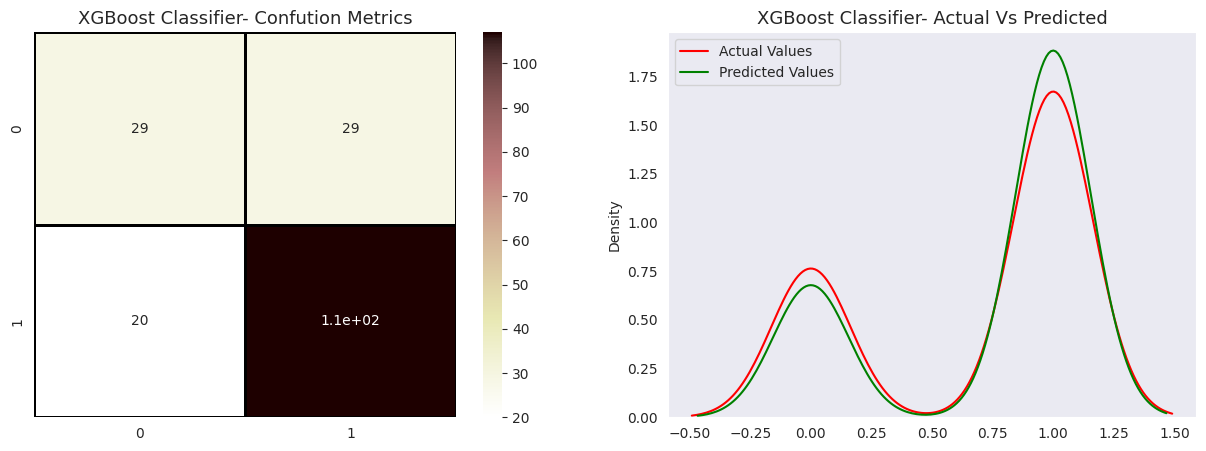

In [26]:
for names, model in classification_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    p = precision_score(y_test, preds)
    print(f"\n💥 Name: {names}")
    print(f"Accuracy: {accuracy:.2f}")   
    print(f"Precision Score: {p}")
    
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, cmap='pink_r', linewidths='2', linecolor='black')
    plt.title(f'{names}- Confution Metrics', fontsize=13)
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(y_test.values, color='red', label='Actual Values')
    sns.kdeplot(preds, color='green',label='Predicted Values')
    plt.title(f'{names}- Actual Vs Predicted', fontsize=13)
    plt.grid()
    plt.legend()
    plt.show()
    


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        Enjoying this notebook? Consider giving it an upvote! Your support inspires me to create more great content and helps others find it too🙌 <br>
        THANKS!
    </ul>
</div>